In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
srcSeq = "queensPuzzle/baseQueensPuzzle.c"
srcParallel = "queensPuzzle/parallelQueensPuzzle.c"
srcFirstRow = "queensPuzzle/firstRowQueensPuzzle.c"

exe_seq = "exe_seq.out"
exe_par = "exe_par.out"
exe_first_row = "exe_first_row.out"

subprocess.run(f"gcc -o {exe_seq} -fopenmp {srcSeq}", shell=True, check=True)
subprocess.run(f"gcc -o {exe_par} -fopenmp {srcParallel}", shell=True, check=True)
subprocess.run(f"gcc -o {exe_first_row} -fopenmp {srcFirstRow}", shell=True, check=True)

N_values_not_seq = range(4, 18)  
N_values_seq = range(4, 17)
repeats = 3

results_seq = []
results_par = []
results_first_row = []

exec_types = [
    (exe_seq, results_seq),
    (exe_par, results_par),
    (exe_first_row, results_first_row)
]

for exe, results in exec_types:
    if exe == exe_seq:
        N_values = N_values_seq
    else:
        N_values = N_values_not_seq
    print(f"Now with exe={exe}")
    for N in N_values:
        times = []
        for _ in range(repeats):
            result = subprocess.run([f"./{exe}", str(N)], capture_output=True, text=True)
            elapsed_time = float(result.stdout.strip())  
            times.append(elapsed_time)
        mean = np.mean(times)
        std = np.std(times)
        results.append((mean, std))
        if N > 12:
            print(f"Done with N={N}")

means_seq, stds_seq = zip(*results_seq)
means_par, stds_par = zip(*results_par)
means_first_row, stds_first_row = zip(*results_first_row)

Now with exe=exe_seq.out
Done with N=13
Done with N=14
Done with N=15
Done with N=16
Now with exe=exe_par.out
Done with N=13
Done with N=14
Done with N=15
Done with N=16
Done with N=17
Now with exe=exe_first_row.out
Done with N=13
Done with N=14
Done with N=15
Done with N=16
Done with N=17


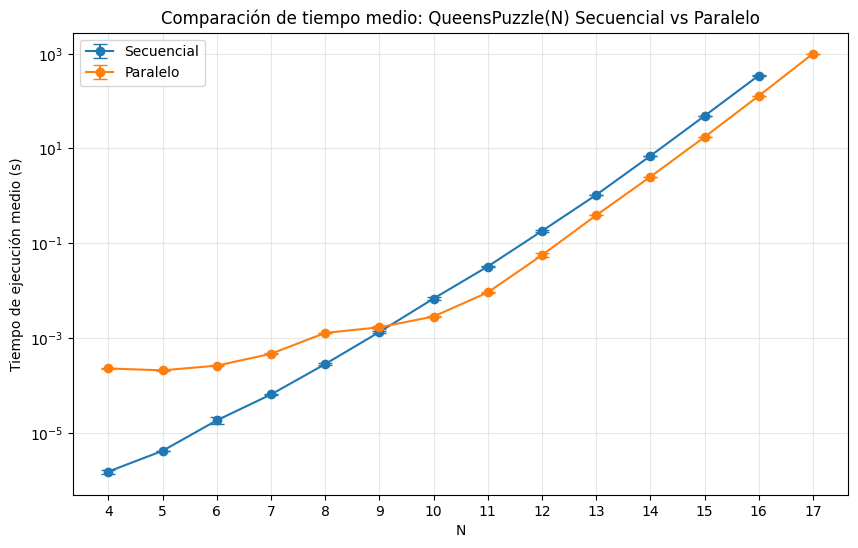

In [6]:
plt.figure(figsize=(10,6))
plt.errorbar(N_values_seq, means_seq, yerr=stds_seq, capsize=5, label="Secuencial", fmt='-o')
plt.errorbar(N_values_not_seq, means_par, yerr=stds_par, capsize=5, label="Paralelo", fmt='-o')
plt.xticks(range(min(N_values), max(N_values) + 1, 1))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: QueensPuzzle(N) Secuencial vs Paralelo")
plt.yscale("log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

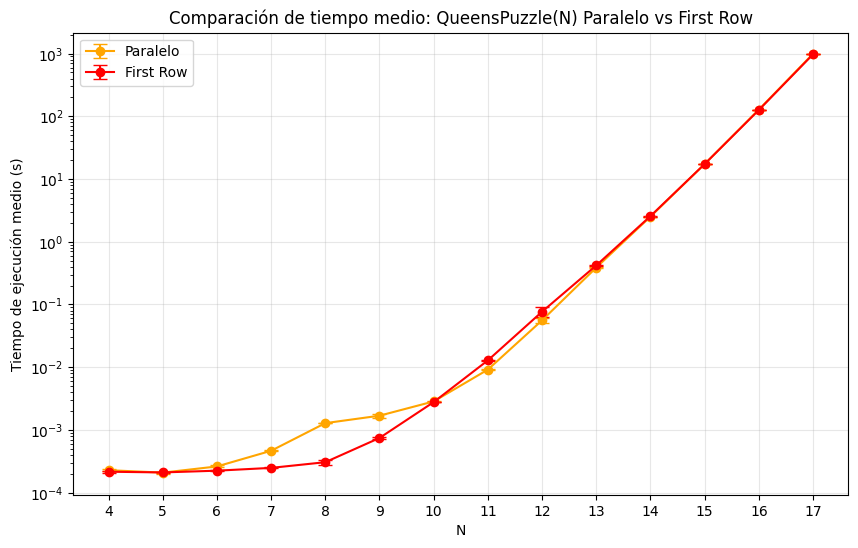

In [8]:
plt.figure(figsize=(10,6))
plt.errorbar(N_values_not_seq, means_par, yerr=stds_par, capsize=5, label="Paralelo", fmt='-o', color="orange")
plt.errorbar(N_values_not_seq, means_first_row, yerr=stds_first_row, capsize=5, label="First Row", fmt='-o', color="red")
plt.xticks(range(min(N_values), max(N_values) + 1, 1))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: QueensPuzzle(N) Paralelo vs First Row")
plt.yscale("log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
srcThrCount = "queensPuzzle/varyingThreadCountQueensPuzzle.c"

exe_thr_count = "exe_varying.out"

subprocess.run(f"gcc -o {exe_thr_count} -fopenmp {srcThrCount}", shell=True, check=True)

N_values = range(4, 16)
repeats = 3

results = {}

for core_count in range(1, 9):
    print(f"{core_count} cores now")
    results[core_count] = []
    for N in N_values:
        times = []
        for _ in range(repeats):
            result = subprocess.run([f"./{exe}", str(N), str(core_count)], capture_output=True, text=True)
            elapsed_time = float(result.stdout.strip())  
            times.append(elapsed_time)
        mean = np.mean(times)
        std = np.std(times)
        results[core_count].append((mean, std))
        if N > 12:
            print(f"Done with N={N}")

1 cores now
Done with N=13
Done with N=14
Done with N=15
2 cores now
Done with N=13
Done with N=14
Done with N=15
3 cores now
Done with N=13
Done with N=14
Done with N=15
4 cores now
Done with N=13
Done with N=14
Done with N=15
5 cores now
Done with N=13
Done with N=14
Done with N=15
6 cores now
Done with N=13
Done with N=14
Done with N=15
7 cores now
Done with N=13
Done with N=14
Done with N=15
8 cores now
Done with N=13
Done with N=14
Done with N=15


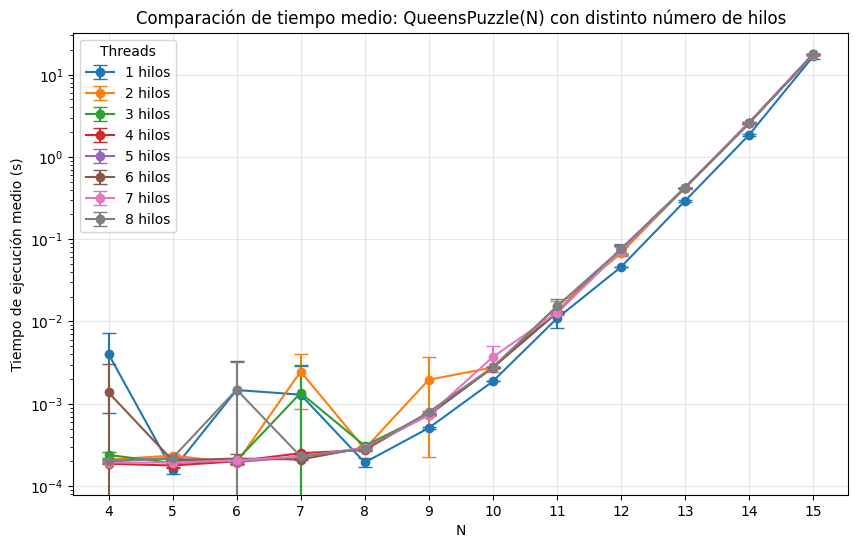

In [13]:
plt.figure(figsize=(10,6))

for core_count, stats in results.items():
    means = [m for m, _ in stats]
    stds = [s for _, s in stats]
    plt.errorbar(N_values, means, yerr=stds, capsize=5, fmt='-o', label=f"{core_count} hilos")

plt.xticks(range(min(N_values), max(N_values) + 1, 1))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: QueensPuzzle(N) con distinto número de hilos")
plt.yscale("log")
plt.legend(title="Threads")
plt.grid(True, alpha=0.3)
plt.show()
